In [1]:
from manim import *
import math
import numpy as np

Manim Community v0.17.3

In [53]:
texPre = TexTemplate()
texPre.add_to_preamble(r"""
    \usepackage{amsmath}
    \usepackage{amssymb}
    \newcommand{\E}{\mathbb{E}}
    \newcommand{\vect}[1]{\mathbf{#1}}
""") 
E_color = GREY_B
n_color = BLUE_C
X_color = BLUE_B
m_color = ORANGE #YELLOW_C
U_color = RED_A
Delta_color = RED_A
S_color = PURPLE_A
dot_color = RED_B
k_color = GREEN_C
t2cD = {
    "\E":E_color,
    "[" : E_color,
    "]" : E_color,
    "n ": n_color,
    "X ": X_color,
    "m ": m_color,
    "\Delta ": Delta_color,
    "U ": U_color,
    "S ": S_color,
    "k ": k_color
}
Mihai = Rectangle(
    width=3,        # Width of the rectangle
    height=4,       # Height of the rectangle
    fill_color=WHITE,  # Fill color
    fill_opacity=0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
)

Mihai.to_corner(DL,buff=0)

hint_fs = 50
nm_Hints = MathTex( r"n : \text{Sides per Dice},",r"\text{  }", r" m : \text{Nu{m} of Dice Rolled}", #  r"\text{ }", r"X : \text{Dice RV,} ", r"\text{ }", r"U : \text{Unif}[0,1] \text{ RV}", # r", $U=$ Unif$[0,1]$ R.V.",
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)
X_Hint = MathTex( r"X {\sim} \text{Dice}\{1, .., n \} ", 
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)       
U_Hint = MathTex( r"U ", r"{\sim}\text{Unif}(0,1)",
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)       
Delta_Hint = MathTex( r"\Delta {\sim} \text{Unif}(0,1) ",
            tex_template=texPre, tex_to_color_map=t2cD,font_size=hint_fs)       

XU_Hints = VGroup(X_Hint,U_Hint,Delta_Hint).arrange(RIGHT) 

XU_Hints.next_to(nm_Hints,DOWN)
XU_Hints.align_to(nm_Hints,LEFT)

Hints = VGroup(nm_Hints,XU_Hints)
Hints.to_corner(DR)


my_fontsize = 65
my_fs = 100

DELAY = 0.1


def rotate_list(lst, n):
    n = n % len(lst)  # Handle cases where n > len(lst)
    return lst[n:] + lst[:n]

def cumulative_sum(lst):
    result = [0]  # Start with 0
    total = 0
    for num in lst:
        total += num
        result.append(total)
    return result



In [3]:
fs2 = 60
FINAL_MOBJECTS = None
FINAL_MOBJECTS_2 = None
FINAL_MOBJECTS_3 = None

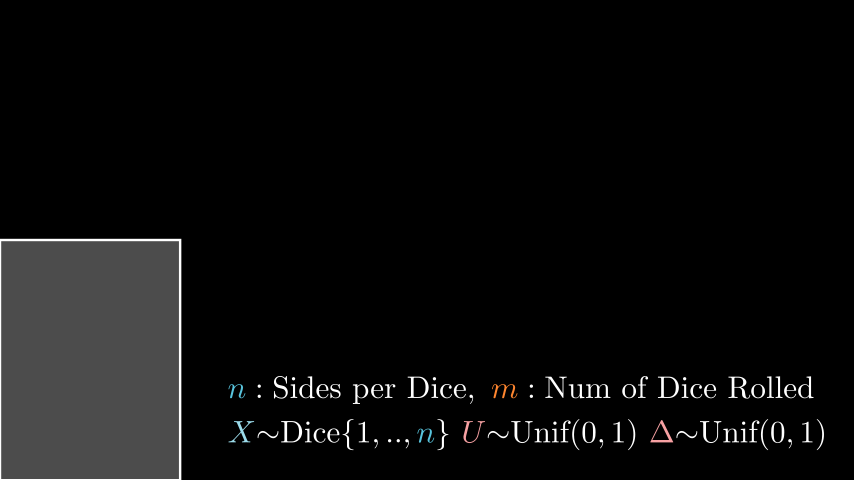

In [54]:
%%manim -ql -v CRITICAL HintsTest
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors



class HintsTest(Scene):
    def construct(self):
        self.add(Mihai,Hints)

In [55]:
%%manim -ql -v CRITICAL FirstApprox
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors



class FirstApprox(Scene):
    def construct(self):
        
        self.add(Mihai,nm_Hints,X_Hint)
        # Step 2: Create a Text object using the t2c argument
        
        first_term = MathTex(r"\text{One Term Approximation:}",font_size=80)
        want_to_show = MathTex(r"\E", r"[", r" \max\{", r"X _1,", r"X _2,", r"..," , r"X _{m }",  r"\}", r"]",
                               r"{\approx}",
                               r"{", r"m ",r"\over",r"{m +1}", r"}", r" n ", 
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=80)
        #print(list(enumerate(want_to_show)))
        #self.add(want_to_show)
        first_term.next_to(want_to_show,UP)
        
        self.play(FadeIn(first_term),LaggedStart(*[Create(mob) for mob in want_to_show],lag_ratio=0.8),run_time=2)
        self.wait(DELAY)
        
        approx = MathTex(r"X ", r" \approx", r"n ", r"U ",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=my_fs)
        
        # Step 3: Add the colored text to the scene
        
        #self.add(text)
        approx.to_edge(UP)
        self.play(Create(approx))
        #self.add(approx)
        self.wait(DELAY)
        
        Unif = MathTex(r"U ", r"{\sim}\text{Unif}(0,1)",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=60)
        
        Unif.next_to(approx[-1],RIGHT,buff=0.8)
        self.play(ReplacementTransform(approx[-1].copy(),Unif[0]),FadeIn(Unif[1:],shift=RIGHT))
        self.wait(DELAY)
        
        
        
        
        off_y = 0.5
        
        n_pts_numberline = 6
        number_line_top = NumberLine(
            x_range=[0, 6, 1],  # Range: start=-5, end=5, step=1
            length=8,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).shift(off_y*UP)
        
        positions_top = [number_line_top.n2p(num) for num in range(0, n_pts_numberline+1)]  # Getting positions for -4 to 4
        dots_top = VGroup(*[Dot(point=positions_top[i], color=n_color, radius=0.1) for i in range(1,n_pts_numberline+1)])
        
        X = MathTex(r"X ",font_size=my_fs,tex_to_color_map=t2cD).next_to(dots_top,UP)
        
        self.play(LaggedStart(FadeOut(want_to_show,first_term),Write(number_line_top),lag_ratio=0.5))
        self.wait(DELAY)
        self.play(LaggedStart(ReplacementTransform(approx[0].copy(),dots_top),
                FadeIn(X,shift=UP),
                lag_ratio=0.5))
        self.wait(DELAY)
        
        
        number_line = NumberLine(
            x_range=[0,n_pts_numberline, 1],  # Range: start=-5, end=5, step=1
            length=8,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).shift(off_y*DOWN)
            
        positions = [number_line.n2p(num) for num in range(0, n_pts_numberline+1)]  # Getting positions for -4 to 4
        dots = VGroup(*[Dot(point=positions[i], color=n_color, radius=0.1) for i in range(1,n_pts_numberline+1)])
        
        self.play(FadeIn(number_line,shift=DOWN))
        self.wait(DELAY)
        
        RectOne = Rectangle(width=positions[1][0] - positions[0][0],
                            height=0.3,
                            fill_color=U_color,  # Fill color
                            fill_opacity=0.3  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                           )
        RectOne.set_x(0.5*(positions[0][0]+positions[1][0]))
        RectOne.set_y(0.5*(positions[0][1]+positions[1][1]))
        
        U = MathTex(r"U ",font_size=my_fs,tex_to_color_map=t2cD).next_to(RectOne,DOWN)
        
        self.play(LaggedStart(ReplacementTransform(approx[-1].copy(),RectOne),
                  FadeIn(U,shift=DOWN),
                 lag_ratio=0.5))
        self.wait(DELAY)
        
        RectAll = Rectangle(width=positions[n_pts_numberline][0] - positions[0][0],
                            height=0.3,
                            fill_color=n_color,  # Fill color
                            fill_opacity=0.5  # Opacity of the fill (0 is fully transparent, 1 is fully opaque)
                           )
        RectAll.set_x(0.5*(positions[0][0]+positions[n_pts_numberline][0]))
        RectAll.set_y(0.5*(positions[0][1]+positions[n_pts_numberline][1]))
        
        
        nU = MathTex(r"n ", r"U ",font_size=my_fs,tex_to_color_map=t2cD).next_to(RectAll,DOWN)
        
        n_copy = approx[-2].copy()
        self.play(n_copy.animate.move_to(U))
        self.play(ReplacementTransform(n_copy,nU[0]),ReplacementTransform(RectOne,RectAll),ReplacementTransform(U,nU[1]))
        self.wait(DELAY)
        
        self.play(FadeOut(RectAll,number_line,number_line_top,dots_top,nU,X,shift=DOWN),TransformMatchingTex(Unif,U_Hint))
        
        #self.play(Transform(approx[0].copy(),dots))
        #self.add(number_line,dots)
        
        global FINAL_MOBJECTS
        FINAL_MOBJECTS = approx

        
        self.wait()

In [59]:
%%manim -ql -v CRITICAL FirstApproxP2
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors



class FirstApproxP2(Scene):
    def construct(self):
        
        approx = FINAL_MOBJECTS.copy()
        self.add(Mihai,nm_Hints,X_Hint, U_Hint, approx)
        
        eqnLHS = MathTex(r"\E[", r" \max\{", r"X _1,", r"X _2,", r"..," , r"X _{m }",  r"\}", r"]",
                      tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        print(list(enumerate(eqnLHS)))
        
        eqnEq = MathTex(r"\approx",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        eqnRHS = MathTex(r" \max\{", r"n ", r" U _1,", r"n ", r" U _2,", r"..," , r"n ", r" U _{m }",  r"\}",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        #eqnRHS[0].color = BLACK #hide the expected value on init
        #eqnRHS[1].color = BLACK
        #eqnRHS[-1].color = BLACK
        
        
        print(list(enumerate(eqnRHS)))
        
        eqns = VGroup(eqnLHS, eqnEq, eqnRHS).arrange(RIGHT).next_to(approx,DOWN,buff=0.6)
        eqns.shift( (eqnEq.get_x() - approx[1].get_x())*LEFT )
        
        eqnRHS2 = MathTex(r"\E[", r"n ", r" \max\{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS2[0].color = BLACK
        eqnRHS2[1].color = BLACK
        eqnRHS2[-1].color = BLACK
        eqnRHS2.set_y(eqnRHS.get_y())
        eqnRHS2.align_to(eqnRHS,LEFT)
        
        eqnRHS3 = MathTex(r"n ",r"\E[",  r" \max\{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnRHS3.set_y(eqnRHS.get_y())
        eqnRHS3.align_to(eqnRHS,LEFT)
        
        
        #self.add(eqns)
        #self.play(*[ReplacementTransform(approx[0].copy(),eqnLHS) for i in [1,2,3,4]])
        
        #self.play(Write(eqnLHS))
        
        #write in X_1,X_2,...,X_m from the X
        self.play(LaggedStart(*[ReplacementTransform(approx[0].copy(),mob) 
                                for mob in [eqnLHS[3:5],eqnLHS[5:7],eqnLHS[7],eqnLHS[8:12]]],
                               lag_ratio=0.7),
                  run_time = 2,
                 )
        
        #Write in \approx
        self.play(ReplacementTransform(approx[1].copy(),eqnEq))
        
        #Write in nU_1, \ldots ,nU_m
        self.play(LaggedStart(*[ReplacementTransform(approx[2:4].copy(),mob) 
                                for mob in [eqnRHS[1:5],eqnRHS[5:9],eqnRHS[9],eqnRHS[10:16]]],
                               lag_ratio=0.7),
                  run_time = 2,
                 )
        self.wait(DELAY)
        
        #add in the max to LHS and RHS
        self.play(FadeIn(eqnLHS[2],eqnRHS[0],shift=RIGHT),FadeIn(eqnLHS[12],eqnRHS[-1],shift=LEFT))
        self.wait(DELAY)
        
        #group the factor of n to the outslide
        self.play(TransformMatchingTex(eqnRHS,eqnRHS2,path_arc=-90 * DEGREES))
        self.wait(DELAY)
        
        #prepare and fade in E
        eqnRHS2[0].color = E_color #recolor these which were hidden before
        eqnRHS2[1].color = E_color
        eqnRHS2[-1].color = E_color
        self.play(FadeIn(eqnLHS[0],eqnLHS[1],eqnRHS2[0],eqnRHS2[1],shift=RIGHT),FadeIn(eqnLHS[-1],eqnRHS2[-1],shift=LEFT))
        self.wait(DELAY)
        
        #pull factor of n out of E
        self.play(TransformMatchingTex(eqnRHS2,eqnRHS3,path_arc=-90 * DEGREES))
        self.wait(DELAY)
        
        global FINAL_MOBJECTS_2
        FINAL_MOBJECTS_2 = approx, eqnLHS, eqnEq, eqnRHS3
        
        
        

[(0, SingleStringMathTex('\\E')), (1, SingleStringMathTex('[')), (2, SingleStringMathTex(' \\max\\{')), (3, SingleStringMathTex('X ')), (4, SingleStringMathTex('_1,')), (5, SingleStringMathTex('X ')), (6, SingleStringMathTex('_2,')), (7, SingleStringMathTex('..,')), (8, SingleStringMathTex('X ')), (9, SingleStringMathTex('_{')), (10, SingleStringMathTex('m ')), (11, SingleStringMathTex('}')), (12, SingleStringMathTex('\\}')), (13, SingleStringMathTex(']'))]
[(0, SingleStringMathTex(' \\max\\{')), (1, SingleStringMathTex('n ')), (2, SingleStringMathTex(' ')), (3, SingleStringMathTex('U ')), (4, SingleStringMathTex('_1,')), (5, SingleStringMathTex('n ')), (6, SingleStringMathTex(' ')), (7, SingleStringMathTex('U ')), (8, SingleStringMathTex('_2,')), (9, SingleStringMathTex('..,')), (10, SingleStringMathTex('n ')), (11, SingleStringMathTex(' ')), (12, SingleStringMathTex('U ')), (13, SingleStringMathTex('_{')), (14, SingleStringMathTex('m ')), (15, SingleStringMathTex('}')), (16, SingleSt

In [60]:
%%manim -ql -v CRITICAL FirstApproxP3
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors



class FirstApproxP3(Scene):
    def construct(self):
        approx, eqnLHS_old, eqnEq_old, eqnRHS_old = [mob.copy() for mob in FINAL_MOBJECTS_2]
        
        self.add(Mihai,nm_Hints,X_Hint,U_Hint,approx,eqnLHS_old, eqnEq_old, eqnRHS_old)
        
        eqnLHS = MathTex(r"\E[",  r" \max\{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        eqnEq = MathTex(r"=",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        eqnRHS = MathTex(r"{", r"m ", r"\over", r"{m + 1}", r"}",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        
        eqns = VGroup(eqnLHS, eqnEq, eqnRHS).arrange(RIGHT).next_to(eqnRHS_old,DOWN,buff=0.6)
        eqns.shift( (eqnEq.get_x() - eqnEq_old.get_x())*LEFT )
        
        will_show = MathTex(r"\text{(will show why!)}",font_size=fs2)
        will_show.next_to(eqnRHS,RIGHT)
        
        
        #self.add(eqnRHS)
        self.play(TransformMatchingTex(eqnRHS_old.copy(),eqnLHS))
        self.play(FadeIn(eqnEq,shift=RIGHT))
        self.wait(DELAY)
        
        #print(list(enumerate(eqnRHS)))
        self.play(LaggedStart(*[Create(piece) for piece in eqnRHS],lag_ratio=0.75),run_time=3)
        self.play(FadeIn(will_show,shift=RIGHT))
        #self.wait(DELAY)
        
        eqnRHS_copy = eqnRHS.copy()
        eqnRHS_copy.generate_target()
        eqnRHS_copy.target.next_to(eqnRHS_old[0],RIGHT)
        self.play(MoveToTarget(eqnRHS_copy),FadeOut(eqnRHS_old[1:]))
        eqnRHS_old[0].generate_target()
        eqnRHS_copy.generate_target()
        eqnRHS_copy.target.next_to(eqnEq_old,RIGHT)
        eqnRHS_old[0].target.next_to(eqnRHS_copy.target,RIGHT)
        self.play(MoveToTarget(eqnRHS_copy,path_arc=-90*DEGREES),MoveToTarget(eqnRHS_old[0],path_arc=-90*DEGREES))
        self.wait(DELAY)
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        
        checkmark.next_to(eqnRHS_old[0],RIGHT)
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.wait(DELAY)
        
        eqns.generate_target()
        my_scale_up = 1.0
        eqns.target.scale(my_scale_up)
        eqns.target.set_x(0)
        eqns.target.to_edge(UP)
        self.play(MoveToTarget(eqns),FadeOut(checkmark,will_show,approx, eqnLHS_old, eqnEq_old, eqnRHS_copy, eqnRHS_old[0]))
        self.wait(DELAY)
        
        eqnLHS2 = MathTex(r"\E[",  r" \max\{", r" U _1,", r" U _2,", r" U _{3 }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).scale(my_scale_up)
        
        eqnEq2 = MathTex(r"=",
                       tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).scale(my_scale_up)
        
        
        eqnRHS2 = MathTex(r"{", r"3 ", r"\over", r"{3+1}", r"}",
                         tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).scale(my_scale_up)
        eqns2 = VGroup(eqnLHS2, eqnEq2, eqnRHS2).arrange(RIGHT).to_edge(UP)
        eqns2.shift(eqnEq.get_x()- eqnEq2.get_x())
        
        for mob in eqns2:
            mob.set_y(eqnEq.get_y())
        
        self.play(FadeOut(nm_Hints,X_Hint,U_Hint,shift=DOWN),*[TransformMatchingTex(mob,mob2) for mob,mob2 in [[eqnLHS,eqnLHS2],[eqnEq,eqnEq2],[eqnRHS,eqnRHS2]] ])
        self.wait(DELAY)
        
        
        
        global FINAL_MOBJECTS_3
        FINAL_MOBJECTS_3 = eqnLHS2, eqnEq2, eqnRHS2
        
        
        
        

In [62]:
%%manim -ql -v CRITICAL MaxOfUs
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors



class MaxOfUs(Scene):
    def construct(self):
        self.add(Mihai) #,Hints)

        eqnLHS_old, eqnEq_old, eqnRHS_old = [mob.copy() for mob in FINAL_MOBJECTS_3]
        self.add(eqnLHS_old, eqnEq_old, eqnRHS_old)
        
        alt_eqn = MathTex(r"\E[",  r"U ", r"^\frac{1}{3}",  r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        alt_int = MathTex(r"\int_0^1",  r"u", r"^\frac{1}{3}",  r"\text{d}u",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        alt_eqn.next_to(eqnEq_old,RIGHT)
        alt_eqn.align_to(eqnLHS_old,DOWN)
        alt_int.next_to(eqnEq_old,RIGHT)
        if True:
            self.play(FadeOut(eqnRHS_old))
            self.wait(DELAY)

            self.play(FadeIn(alt_eqn,shift=RIGHT))
            self.wait(DELAY)

            self.play(FadeOut(alt_eqn,shift=RIGHT),FadeIn(alt_int,shift=RIGHT))
            self.wait(DELAY)
        else:
            self.remove(eqnRHS_old)

        self.play(FadeOut(alt_int, eqnLHS_old[0:2],eqnLHS_old[-1],eqnEq_old))
        self.wait(DELAY)

        number_line = NumberLine(
            x_range=[0,1, 1],  # Range: start=-5, end=5, step=1
            length=6,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).scale(1.5)
        self.play(Create(number_line))
        self.wait(DELAY)
        
        # Values to mark with dots
        values = [0.75, 0.2, 0.6]
        num_vals = len(values)

        # Create dots at specified values
        
        dots = VGroup(*[
            Dot(point=number_line.number_to_point(value), color = dot_color, radius=0.1)
            for value in values
        ])
        
        #self.add(dots)  # Add the dots to the scene
        
         # Create underbraces from the left edge of the number line to each dot
        underbraces = VGroup(*[
            BraceBetweenPoints(
                number_line.number_to_point(0),  # Start at the left edge of the number line
                number_line.number_to_point(value),  # End at the dot's position
                #label=f"{value}",  # Label the underbrace with the value of the dot
                color=U_color # Set the color of the underbrace
            )
            for value in values
        ])
        #self.add(underbraces)  # Add the underbraces to the scene
        
        brace_labels = VGroup(*[
            MathTex(f"U _{i+1}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(underbraces[i],DOWN)
            for i,value in enumerate(values)
        ])
        #self.add(brace_labels)  # Add the underbraces to the scene
        print(list(enumerate(eqnLHS_old)))
        Us = [eqnLHS_old[4:6],eqnLHS_old[7:9],eqnLHS_old[10:12]]
        for k in range(num_vals+1):
            anim_list = []
            if k <= num_vals-1:
                anim_list = [ReplacementTransform(Us[k].copy(),VGroup(dots[k],underbraces[k],brace_labels[k]))]
            if k >= 1:
                anim_list.append(FadeOut(underbraces[k-1],brace_labels[k-1],shift=DOWN))
            self.play(*anim_list)
            self.wait(1)
        
        val_argmax = 0 #where did the maximum occur?
        max_brace_label = MathTex(r" \max\{", r"U _1,", r"U _2,", r"U _{3 }",  r"\}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(underbraces[val_argmax],DOWN)
        
        self.play(ReplacementTransform(eqnLHS_old[2:-1].copy(),VGroup(underbraces[val_argmax],max_brace_label)))
        self.wait(DELAY)
        #self.play(FadeOut(underbraces[val_argmax],max_brace_label,shift=DOWN))
        #self.wait(DELAY)
        
        ####
        
        sorted_values = sorted(values)
        vals_with_endpoints = [0.0]+sorted_values+[1.0]
        
        x_off = 0.01
        S_braces = VGroup(*[
            BraceBetweenPoints(
                number_line.number_to_point(vals_with_endpoints[k-1]+x_off),  # Start at the left edge of the number line
                number_line.number_to_point(vals_with_endpoints[k]-x_off),  # End at the dot's position
                #label=f"{value}",  # Label the underbrace with the value of the dot
                color=S_color,  # Set the color of the underbrace
                direction = UP,
            )
            for k in range(1,num_vals+2)
        ])
        #self.add(underbraces)  # Add the underbraces to the scene
        
        S_brace_labels = VGroup(*[
            MathTex(f"S _{i+1}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(S_braces[i],UP)
            for i in range(num_vals+1)
        ])
        
        self.play(LaggedStart(*[FadeIn(S_braces[k], S_brace_labels[k],shift=UP) for k in range(num_vals+1)],lag_ratio=0.75))
        self.wait(DELAY)
        
        ###
        
        S_sum = MathTex(r"\E [ S _1 ]+\E [ S _2 ]+\E[ S _3 ]",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(underbraces[val_argmax],DOWN)
        print(list(enumerate(S_sum)))
        Ss = [S_sum[4:6],S_sum[12:14],S_sum[19:21]]
        
        
        S_sum.next_to(eqnEq_old,RIGHT)
        
        eqnLHS_old[0:2].color=BLACK #hide the E[ 
        eqnLHS_old[-1].color = BLACK #hide the ]
        
        eqnLHS_old.generate_target()
        full_eqn = VGroup(eqnLHS_old.target,eqnEq_old,S_sum)
        full_eqn.set_x(0)
        
        anim_list = [MoveToTarget(eqnLHS_old),
                     FadeIn(eqnEq_old,shift=RIGHT), #=
                     ReplacementTransform(S_brace_labels[0].copy(),Ss[0]),
                     FadeIn(S_sum[7],shift=RIGHT), #plus
                     ReplacementTransform(S_brace_labels[1].copy(),Ss[1]),
                     FadeIn(S_sum[15],shift=RIGHT), #plus
                     ReplacementTransform(S_brace_labels[2].copy(),Ss[2]),
                    ]
                     
        self.play(LaggedStart(*anim_list,lag_ratio=0.5))
        self.wait(DELAY)
        
        
        eqnLHS_old[0:2].color= E_color #un hide the E[ 
        eqnLHS_old[-1].color = E_color #un hide the ]
        
        self.play(FadeIn(eqnLHS_old[0:2],S_sum[0:3],shift=RIGHT),FadeIn(eqnLHS_old[-1],S_sum[-1],shift=LEFT))
        self.wait(DELAY)
        
        
        mob_pairs = [[S_sum[0:3],S_sum[8:11]],[S_sum[0:3],S_sum[16:18]],[S_sum[-1],S_sum[6]],[S_sum[-1],S_sum[14]] ]
          
        
        self.play(*[ReplacementTransform(from_mob.copy(),to_mob,path_arc=90*DEGREES) for from_mob,to_mob in mob_pairs])
        self.wait(DELAY)
        
        ###arcs code
        
        num_arcs = 4
        spaces = [0.2, 0.35, 0.15, 0.3] #must sum to 1
        original_U_vals = cumulative_sum(spaces) #[0] + non_trivial_U_vals + [1]
        U_vals = cumulative_sum(spaces)
        angles = [2*PI*U_vals[i] for i in range(num_arcs+1)]
        mycolor = [WHITE,WHITE,WHITE,WHITE] #[RED, BLUE, ORANGE, GREEN]
        END_PT_COLOR = GREY
        lbl_txt = [r"S _1",r"S _2",r"S _3",r"S _4"]
        
        my_radius = 1.25
        
        arcs = [Arc(radius=my_radius,start_angle=angles[i],angle=angles[i+1]-angles[i]) for i in range(num_arcs)]
        labels = [ MathTex(lbl_txt[i],
                           tex_template=texPre, tex_to_color_map=t2cD,font_size = my_fontsize) for i in range(num_arcs)]
        braces = [ArcBrace(arcs[i],RIGHT) for i in range(num_arcs)]
        arc_dots = [Dot([my_radius*math.cos(angles[i]),my_radius*math.sin(angles[i]),0],color=dot_color,radius=0.1) for i in range(num_arcs) ]
        arc_dots[0].set_color(END_PT_COLOR)
        
        for i in range(num_arcs):
            labels[i].move_to(1.0*braces[i].get_tip())# num_arc_points//2])
            arcs[i].set_color(mycolor[i])
            #labels[i].set_color(mycolor[i])
            
        VGroup(*arcs,*labels,*braces,*arc_dots) #.to_edge(DOWN,buff=0.2)
        
        new_dot = Dot(point=number_line.number_to_point(1), color = END_PT_COLOR, radius=0.1)
        
        self.play(FadeOut(*S_braces,shift=UP),FadeOut(underbraces[val_argmax],max_brace_label,shift=DOWN),FadeIn(new_dot))
        self.play(ReplacementTransform(S_brace_labels,VGroup(*labels)),
                  ReplacementTransform(number_line, VGroup(*arcs)),
                  ReplacementTransform(VGroup(new_dot,dots[1],dots[2],dots[0]),VGroup(*arc_dots)),
                  runt_time=4)
        #self.add(*arcs,*labels,*arc_dots)
        self.wait(DELAY)
        
        for perm in range(num_arcs):
            if perm < num_arcs - 1:
                label_anims = [labels[k].animate.move_to(labels[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                self.play(*label_anims, arc_dots[(perm+1)%num_arcs].animate.set_color(GREY),arc_dots[perm].animate.set_color(dot_color)  ) #, *dot_anims)
                self.wait(DELAY)
                
        #####
        S_three = MathTex(r"3", r"\:", r"\E [ S _1 ]",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        S_three.next_to(eqnEq_old,RIGHT)
        self.play(TransformMatchingTex(S_sum,S_three))
        self.wait(DELAY)
        
        
        sum_s = MathTex(r"\E[ {S _1}", r" + S _2 + S _3 + S _4", r"]", r"=", r"1",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        
        
        sum_s.next_to(arc_dots[0],RIGHT,buff=0.85)
        
        x_shift = 2.4
        sum_s.shift(x_shift*LEFT)
        
        all_circle_stuff = VGroup(*arc_dots, *arcs, *labels)
        
        self.play(all_circle_stuff.animate.shift(x_shift*LEFT))
        self.play(ReplacementTransform(VGroup(*labels).copy(),sum_s))
        self.wait(DELAY)
        
        
        four_s = MathTex(r"4", r"\E[ {S _1}", r"]", r"=", r"1",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        four_s.align_to(sum_s,LEFT)
        self.play(TransformMatchingTex(sum_s,four_s))
        self.wait(DELAY)
        
        s_quarter = MathTex(r"\E[ {S _1}", r"]", r"=", r"{", r"1", r"\over", r"4", r"}",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        s_quarter.align_to(four_s,LEFT)
        self.play(TransformMatchingTex(four_s,s_quarter))
        self.wait(DELAY)
        ###
        
        
        three_quarters = MathTex(r"=",r"{", r"3", r"\over", r"4", r"}",
                    tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        three_quarters.next_to(S_three,RIGHT)
        print(list(enumerate(three_quarters)))
        self.play(ReplacementTransform(S_three[0].copy(),three_quarters[2],path_arc=-90*DEGREES),
                  ReplacementTransform(S_three[2:].copy(),three_quarters[3:],path_arc=90*DEGREES),
                  FadeIn(three_quarters[0],shift=RIGHT),
                 )
        self.wait(DELAY)
        
        
        checkmark = MathTex(r"\checkmark")
        checkmark.set_color(GREEN)  # Set the color of the checkmark
        checkmark.scale(2)
        
        checkmark.next_to(three_quarters,RIGHT)
        self.play(FadeIn(checkmark,shift=RIGHT))
        self.wait(DELAY)
        
        final_point = MathTex(r"\E[",  r" k \text{th} \{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}", r"]",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        #final_point.to_edge(LEFT,buff=1.5)
        
        final_eq = MathTex(r"=",
                          tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2)
        final_eq.next_to(final_point,RIGHT)
        final_stuff = VGroup(final_point,final_eq)
        
        final_stuff.next_to(eqnLHS_old,DOWN,buff=1)
        final_stuff.align_to(eqnLHS_old,LEFT)
        #final_stuff.shift(final_eq.get_x()*LEFT) #shift so equals is in the center
        
        
        
        
        
        final_RHS_1 =  MathTex(r"\E[ {S _1}", r" + S _2 + .. + S _k ", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(final_eq,RIGHT)
        
        
        final_RHS_2 = MathTex(r"k ", r"\E[ {S _1}", r"]",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(final_eq,RIGHT)
        
        
        final_RHS_3 = MathTex(r"{", r"k ", r"\over", r" m + 1", r"}",
                        tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(final_eq,RIGHT)
        
        
        
        self.play(FadeOut(all_circle_stuff,s_quarter,shift=DOWN),
                  TransformMatchingTex(eqnLHS_old.copy(),final_point))
        self.wait(DELAY)
        
        new_number_line = NumberLine(
            x_range=[0,1, 1],  # Range: start=-5, end=5, step=1
            length=6,           # Total length of the number line
            color=WHITE,          # Line color
            include_numbers=True, # Show numbers on the line
            #label_direction=UP,  # Place labels above the line
        ).scale(1.5)
        new_number_line.shift(1.25*DOWN+0.45*RIGHT)
        
        new_dots = VGroup(*[
            Dot(point=new_number_line.number_to_point(value), color = dot_color, radius=0.1)
            for value in values
        ])
        
        self.play(Create(new_number_line),FadeIn(new_dots))
        self.wait(DELAY)
        
        kth_brace = BraceBetweenPoints(
                new_number_line.number_to_point(0)+0.02,  # Start at the left edge of the number line
                new_number_line.number_to_point(values[2])-0.01,  # End at the dot's position
                #label=f"{value}",  # Label the underbrace with the value of the dot
                color=k_color # Set the color of the underbrace
            )
        
        kth_brace_label = MathTex(r" k \text{th} \{", r" U _1,", r" U _2,", r"..," , r" U _{m }",  r"\}",
                                  tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(kth_brace,DOWN)
        
        self.play(ReplacementTransform(final_point[2:-1].copy(),VGroup(kth_brace_label,kth_brace)))
        self.wait(DELAY)
        
        
        self.play(FadeIn(final_eq),FadeIn(final_RHS_1,shift=RIGHT))
        self.wait(DELAY)
        
        
        self.play(TransformMatchingTex(final_RHS_1,final_RHS_2))
        self.wait(DELAY)
        
        
        self.play(TransformMatchingTex(final_RHS_2,final_RHS_3))
        self.wait(DELAY)
        
        
        beta = MathTex(r" = \E[ \text{Beta}(k , m - k + 1) ]",
                                  tex_template=texPre, tex_to_color_map=t2cD,font_size=fs2).next_to(kth_brace,DOWN)
        
        beta.next_to(final_RHS_2,DOWN,buff=0.8)
        beta.align_to(final_eq,LEFT)
        
        self.play(FadeIn(beta,shift=DOWN))
        
        nasty_int = MathTex(r"\binom{m}{k-1}","\int_0^1", r"x", r"^{k}", r"(1-x)", r"^{m - k }", r"\text{d}x",
                     tex_template=texPre, tex_to_color_map=t2cD,font_size=0.7*fs2)
        #nasty_int.next_to(final_eq,DOWN,buff=1.7)
        nasty_int.next_to(beta,LEFT)
        self.play(FadeIn(nasty_int,shift=LEFT)) #,FadeOut(kth_brace_label,kth_brace,new_dots,new_number_line,shift=DOWN))
        self.wait(DELAY)


[(0, SingleStringMathTex('\\E')), (1, SingleStringMathTex('[')), (2, SingleStringMathTex(' \\max\\{')), (3, SingleStringMathTex(' ')), (4, SingleStringMathTex('U ')), (5, SingleStringMathTex('_1,')), (6, SingleStringMathTex(' ')), (7, SingleStringMathTex('U ')), (8, SingleStringMathTex('_2,')), (9, SingleStringMathTex(' ')), (10, SingleStringMathTex('U ')), (11, SingleStringMathTex('_{3 }')), (12, SingleStringMathTex('\\}')), (13, SingleStringMathTex(']'))]


[(0, SingleStringMathTex('\\E')), (1, SingleStringMathTex(' ')), (2, SingleStringMathTex('[')), (3, SingleStringMathTex(' ')), (4, SingleStringMathTex('S ')), (5, SingleStringMathTex('_1 ')), (6, SingleStringMathTex(']')), (7, SingleStringMathTex('+')), (8, SingleStringMathTex('\\E')), (9, SingleStringMathTex(' ')), (10, SingleStringMathTex('[')), (11, SingleStringMathTex(' ')), (12, SingleStringMathTex('S ')), (13, SingleStringMathTex('_2 ')), (14, SingleStringMathTex(']')), (15, SingleStringMathTex('+')), (16, SingleStringMathTex('\\E')), (17, SingleStringMathTex('[')), (18, SingleStringMathTex(' ')), (19, SingleStringMathTex('S ')), (20, SingleStringMathTex('_3 ')), (21, SingleStringMathTex(']'))]


[(0, SingleStringMathTex('=')), (1, SingleStringMathTex('{')), (2, SingleStringMathTex('3')), (3, SingleStringMathTex('\\over')), (4, SingleStringMathTex('4')), (5, SingleStringMathTex('}'))]


In [569]:
%%manim -ql -v CRITICAL BetaRV
#-ql = quality low. change to -qh before final production
#CRITICAL = only show critical errors

my_fontsize = 65


FINAL_MOBJECTS = None

def rotate_list(lst, n):
    n = n % len(lst)  # Handle cases where n > len(lst)
    return lst[n:] + lst[:n]

def cumulative_sum(lst):
    result = [0]  # Start with 0
    total = 0
    for num in lst:
        total += num
        result.append(total)
    return result

class BetaRV(Scene):
    def construct(self):
        
        num_arcs = 4
        spaces = [0.2, 0.35, 0.15, 0.3] #must sum to 1
        original_U_vals = cumulative_sum(spaces) #[0] + non_trivial_U_vals + [1]
        U_vals = cumulative_sum(spaces)
        angles = [2*PI*U_vals[i] for i in range(num_arcs+1)]
        mycolor = [WHITE,WHITE,WHITE,WHITE] #[RED, BLUE, ORANGE, GREEN]
        END_PT_COLOR = GREY
        lbl_txt = [r"S _1",r"S _2",r"S _3",r"S _4"]
        
        my_radius = 1.25
        
        arcs = [Arc(radius=my_radius,start_angle=angles[i],angle=angles[i+1]-angles[i]) for i in range(num_arcs)]
        labels = [ MathTex(lbl_txt[i],
                           tex_template=texPre, tex_to_color_map=t2cD,font_size = my_fontsize) for i in range(num_arcs)]
        braces = [ArcBrace(arcs[i],RIGHT) for i in range(num_arcs)]
        arc_dots = [Dot([my_radius*math.cos(angles[i]),my_radius*math.sin(angles[i]),0],color=dot_color,radius=0.1) for i in range(num_arcs) ]
        arc_dots[0].set_color(END_PT_COLOR)
        
        for i in range(num_arcs):
            labels[i].move_to(1.0*braces[i].get_tip())# num_arc_points//2])
            arcs[i].set_color(mycolor[i])
            #labels[i].set_color(mycolor[i])
            
        VGroup(*arcs,*labels,*braces,*arc_dots) #.to_edge(DOWN,buff=0.2)
        
        self.add(*arcs,*labels,*arc_dots)
        self.wait(2)
        
        
        for perm in range(num_arcs):
            if perm < num_arcs - 1:
                label_anims = [labels[k].animate.move_to(labels[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                #dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                self.play(*label_anims, arc_dots[(perm+1)%num_arcs].animate.set_color(GREY),arc_dots[perm].animate.set_color(dot_color)  ) #, *dot_anims)
        
        return 0
        
        
        num_arc_points = braces[0].n_points_per_curve
        
        my_lines = [None for i in range(num_arcs)]
        my_line_dots = [None for i in range(num_arcs)]
        
        for perm in range(num_arcs):
            l_scale = 2*PI*my_radius #/(2*spaces[0]+2*spaces[1]+2*spaces[2]+spaces[3])
            U_vals = cumulative_sum(rotate_list(spaces,perm))
            print(U_vals)
            lines = [Line(start=U_vals[i]*RIGHT*l_scale, end=U_vals[i+1]*RIGHT*l_scale) for i in range(num_arcs)]    
            line_dots = [Dot(U_vals[i]*RIGHT*l_scale,color=dot_color) for i in range(num_arcs+1)]  
            line_dots[0].set_color(END_PT_COLOR)
            line_dots[-1].set_color(END_PT_COLOR)
            
            for i in range(num_arcs):
                #arcs[i].set_color(mycolor[i])
                #labels[i].set_color(rotate_list(mycolor,perm)[i])
                lines[i].set_color(rotate_list(mycolor,perm)[i])
            #labels[i].move_to(arcs[i].points[0])
            #labels[i].move_to(1.0*braces[i].get_tip())# num_arc_points//2])
            temp = VGroup(*lines,*line_dots).to_edge(LEFT).to_edge(UP, buff = 0.4*(1+perm)).shift(RIGHT*l_scale*original_U_vals[perm])
            my_lines[perm] = lines
            my_line_dots[perm] = line_dots
            
        for perm in range(num_arcs):
            lines = my_lines[perm]
            line_dots = my_line_dots[perm]
            edge_anims = [ReplacementTransform(rotate_list(arcs,perm)[i].copy(),lines[i],arc_angle=270) for i in range(num_arcs)]
            vertex_anims = [ReplacementTransform(rotate_list(arc_dots,0)[i].copy(),line_dots[i],arc_angle=90) for i in range(num_arcs)]
            vertex_anims.append(ReplacementTransform(rotate_list(arc_dots,0)[0].copy(),line_dots[-1]))
            
            self.play(*edge_anims,*vertex_anims)
            
            if perm < num_arcs - 1:
                label_anims = [labels[k].animate.move_to(labels[(k+1)%num_arcs]) for k in range(num_arcs)]
                dot_anims = [arc_dots[k].animate.move_to(arc_dots[(k+1)%num_arcs]) for k in range(num_arcs)]
                self.play(*label_anims, *dot_anims)
            
        #self.add(my_line[perm])
            
            
        
        
        
        self.wait(2)

In [12]:
%%manim -qh -v CRITICAL UnrollCircle
from manim import *

class UnrollCircle(Scene):
    def construct(self):
        # Create a circle and a line
        circle_radius = 2
        circle = Circle(radius=circle_radius, color=BLUE)
        line_length = 2 * PI * circle_radius
        line = Line(start=[-line_length / 2, 0, 0], end=[line_length / 2, 0, 0], color=GREEN)

        # Position the circle above the line
        circle.shift(UP * circle_radius)

        # Create a dot at the circle's edge
        dot = Dot(point=circle.point_from_proportion(0), color=RED)

        # Add the circle, line, and dot to the scene
        self.add(line, circle, dot)

        # Animate the unrolling
        self.play(
            UnrollCircleToLine(circle, line, dot),
            run_time=6,
            rate_func=linear,
        )
        self.wait()


class UnrollCircleToLine(Animation):
    def __init__(self, circle, line, dot, **kwargs):
        super().__init__(circle, **kwargs)
        self.circle = circle
        self.line = line
        self.dot = dot
        self.circle_radius = circle.radius
        self.line_start = self.line.get_start()
        self.line_length = self.line.get_length()

    def interpolate_mobject(self, alpha):
        # Compute the current x position of the circle center
        new_center_x = self.line_start[0] + self.line_length * alpha

        # Move the circle horizontally while keeping it tangent to the line
        self.circle.move_to([new_center_x, self.circle_radius, 0])

        # Rotate the circle to simulate unrolling
        angle = -TAU * alpha
        self.circle.rotate(angle)

        # Move the dot along the edge of the circle
        proportion = alpha % 1  # Ensure proportion stays between 0 and 1
        dot_position = self.circle.point_from_proportion(proportion)
        self.dot.move_to(dot_position)


In [126]:
%%manim -qh -v CRITICAL UpdaterTest

class UpdaterTest(Scene):
    def construct(self):
        # Create a dot and set its initial position
        dot = Dot(point=LEFT * 4)

        # Define the updater function to move the dot based on an absolute position
        def update_dot(mob, dt):
            # Calculate the new absolute position
            new_x_position = mob.get_center()[0] + dt * 2  # Moving to the right at 2 units per second
            new_position = np.array([new_x_position, mob.get_center()[1], 0])
            
            # Move dot to the new absolute position
            mob.move_to(new_position)

        # Add the updater to the dot
        dot.add_updater(update_dot)

        # Add the dot to the scene
        self.add(dot)

        # Play the animation for 4 seconds, dot will move to the right
        self.wait(4)

        # Remove the updater after animation
        dot.remove_updater(update_dot)